In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import sklearn, catboost, xgboost

# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import classification_report, plot_confusion_matrix
# from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, precision_recall_curve, average_precision_score, roc_curve, auc

from sklearn.preprocessing import StandardScaler

In [2]:
# Predict your new samples of silica nanoparticles by running this code, and PLEASE WAIT until the results have been downloaded

data = pd.read_csv(r'./Main_Indepedent_Dataset.csv', encoding='unicode_escape')
independent_id = 116

def convert(Cell_viability):
    if Cell_viability == 'Cytotoxic':
        return 1
    if Cell_viability == 'Non_cytotoxic':
        return 0
    else:
        return ''

def convert_back(Cell_viability):
    if Cell_viability == 1:
        return 'Cytotoxic'
    if Cell_viability == 0:
        return 'Non_cytotoxic'
    else:
      return ''

data['convert'] = data['Cell_viability'].apply(convert)
data = data.drop('Cell_viability', axis=1)
data = data.rename(columns={'convert':'Cell_viability'})

shuffled_main_dataset = data[data['Publication_id'] < independent_id].sample(frac=1, random_state=2022)
independent_dataset = data[data['Publication_id'] >= independent_id]

X = shuffled_main_dataset.drop(columns=['Viability_indicator','Cell_viability','Positive_control', 'Positive_control_inducer','SiO$_{2}$NP_label', 'Interference_testing','Viability_mechanism','Assay_viability'], axis=1)
X = pd.get_dummies(shuffled_main_dataset.drop('Cell_viability', axis=1))
X = X.drop([
    'SiO$_{2}$NP_medium_serum_15%_FBS',
    'Cell_morphology_microglia',

    'Cell_organ_heart',

    'Cell_id_MPMC/3t3',

    'Surface_modification_CHO',
    'Hydrodynamic_size_water_nm_not_determined',
    'Cell_source_hamster',
    'Assay_viability_Sytox_Red',

    'Viability_indicator_live_cell',
], axis=1)
X = X.drop('Publication_id',axis=1)


y = shuffled_main_dataset[['Cell_viability', 'Publication_id']]
y = y.drop('Publication_id',axis=1)
y = y.to_numpy().ravel()

In [3]:
X.columns

Index(['Concentration_µg/ml', 'Primary_size_nm', 'Exposure_time_h',
       'Surface_area_m2/g', 'SiO$_{2}$NP_medium_serum_0.1%_FBS',
       'SiO$_{2}$NP_medium_serum_0.5%_FBS', 'SiO$_{2}$NP_medium_serum_1%_FBS',
       'SiO$_{2}$NP_medium_serum_10%_FBS', 'SiO$_{2}$NP_medium_serum_2%_FBS',
       'SiO$_{2}$NP_medium_serum_20%_FBS',
       ...
       'PDI_culture_less_0.101', 'PDI_culture_not_determined',
       'Surface_charge_water_negative', 'Surface_charge_water_positive',
       'SiO$_{2}$NP_label_FITC', 'SiO$_{2}$NP_label_Iodine-125',
       'SiO$_{2}$NP_label_none', 'SiO$_{2}$NP_label_rhodamine',
       'SiO$_{2}$NP_shape_rod', 'SiO$_{2}$NP_shape_sphere'],
      dtype='object', length=308)

In [4]:
X

,Concentration_µg/ml,Primary_size_nm,Exposure_time_h,Surface_area_m2/g,SiO$_{2}$NP_medium_serum_0.1%_FBS,SiO$_{2}$NP_medium_serum_0.5%_FBS,SiO$_{2}$NP_medium_serum_1%_FBS,SiO$_{2}$NP_medium_serum_10%_FBS,SiO$_{2}$NP_medium_serum_2%_FBS,SiO$_{2}$NP_medium_serum_20%_FBS,...,PDI_culture_less_0.101,PDI_culture_not_determined,Surface_charge_water_negative,Surface_charge_water_positive,SiO$_{2}$NP_label_FITC,SiO$_{2}$NP_label_Iodine-125,SiO$_{2}$NP_label_none,SiO$_{2}$NP_label_rhodamine,SiO$_{2}$NP_shape_rod,SiO$_{2}$NP_shape_sphere
3828,50.0,59.72,72.0,49.724000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
189,167.0,15.20,48.0,179.425837,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
644,90.0,19.40,24.0,145.000000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
3655,40.0,13.00,24.0,203.920000,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,True
604,10.0,13.80,24.0,275.000000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,300.0,11.70,4.0,233.100233,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
24,100.0,100.00,24.0,27.272727,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,True
2066,100.0,85.69,72.0,31.800000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
173,667.0,80.21,48.0,34.001655,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True


In [5]:
len(y)

4124

In [6]:
# -----------------------------
# 完整示例：TabPFN + SHAP
# -----------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import shap
import matplotlib.pyplot as plt
# -----------------------------
# 4. 拆分训练/测试集
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
feature_names = X.columns.tolist()
print(f"Original Feature Names: {feature_names}")

Original Feature Names: ['Concentration_µg/ml', 'Primary_size_nm', 'Exposure_time_h', 'Surface_area_m2/g', 'SiO$_{2}$NP_medium_serum_0.1%_FBS', 'SiO$_{2}$NP_medium_serum_0.5%_FBS', 'SiO$_{2}$NP_medium_serum_1%_FBS', 'SiO$_{2}$NP_medium_serum_10%_FBS', 'SiO$_{2}$NP_medium_serum_2%_FBS', 'SiO$_{2}$NP_medium_serum_20%_FBS', 'SiO$_{2}$NP_medium_serum_40%_FBS', 'SiO$_{2}$NP_medium_serum_5%_FBS', 'SiO$_{2}$NP_medium_serum_BSA', 'SiO$_{2}$NP_medium_serum_serum_free', 'Cell_morphology_dendritic', 'Cell_morphology_endothelial', 'Cell_morphology_epithelial', 'Cell_morphology_fibroblast', 'Cell_morphology_keratinocyte', 'Cell_morphology_lymphocyte', 'Cell_morphology_macrophage', 'Cell_morphology_monocyte', 'Cell_morphology_monocyte_macrophage', 'Cell_morphology_myoblast', 'Cell_morphology_neuronal', 'Cell_morphology_stem_cell', 'Cell_organ_adrenal_gland', 'Cell_organ_ascites', 'Cell_organ_blood', 'Cell_organ_bone-marrow', 'Cell_organ_brain', 'Cell_organ_cell_hybrid', 'Cell_organ_cervix', 'Cell_or

In [8]:
from tabpfn_extensions import interpretability

/root/miniconda3/lib/python3.10/site-packages/hyperopt/atpe.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [9]:
X

,Concentration_µg/ml,Primary_size_nm,Exposure_time_h,Surface_area_m2/g,SiO$_{2}$NP_medium_serum_0.1%_FBS,SiO$_{2}$NP_medium_serum_0.5%_FBS,SiO$_{2}$NP_medium_serum_1%_FBS,SiO$_{2}$NP_medium_serum_10%_FBS,SiO$_{2}$NP_medium_serum_2%_FBS,SiO$_{2}$NP_medium_serum_20%_FBS,...,PDI_culture_less_0.101,PDI_culture_not_determined,Surface_charge_water_negative,Surface_charge_water_positive,SiO$_{2}$NP_label_FITC,SiO$_{2}$NP_label_Iodine-125,SiO$_{2}$NP_label_none,SiO$_{2}$NP_label_rhodamine,SiO$_{2}$NP_shape_rod,SiO$_{2}$NP_shape_sphere
3828,50.0,59.72,72.0,49.724000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
189,167.0,15.20,48.0,179.425837,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
644,90.0,19.40,24.0,145.000000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
3655,40.0,13.00,24.0,203.920000,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,True
604,10.0,13.80,24.0,275.000000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,300.0,11.70,4.0,233.100233,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
24,100.0,100.00,24.0,27.272727,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,True
2066,100.0,85.69,72.0,31.800000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
173,667.0,80.21,48.0,34.001655,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True


In [10]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# Cubist 没有直接的 Python 分类实现，这里用类似思想的 XGBoost 替代示例
from xgboost import XGBClassifier
# 假设有 cubist 库也可略过或自行替换

# 1 - GBDT  → GradientBoostingClassifier
gbdt_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=0.8
)

# 2 - Random Forest  → RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=9,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True
)

# 3 - 多元线性回归 → 逻辑回归(Logistic Regression)
lr_model = LogisticRegression(
    penalty='l2',
    solver='lbfgs',
    max_iter=1000
)

# 4 - Cubist → 这里无法直接用 Cubist 做分类
#    可使用 XGBoost 替代（或保留为 R 语言版本）
cubist_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic'   # 二分类；多分类改为 'multi:softprob' 并设置 num_class
)

# 5 - SVR → SVC
svr_model = SVC(
    C=10,
    kernel='rbf',
    gamma=0.1,
    probability=True            # 需要预测概率时
)

# 6 - BPNN（使用 MLPClassifier 模拟 BPNN）
bpnn_model = MLPClassifier(
    hidden_layer_sizes=(100, 100, 100),
    activation='relu',
    solver='adam',
    alpha=0.3,
    batch_size=200,
    learning_rate_init=0.05,
    momentum=0.9,
    validation_fraction=0.2,
    shuffle=True,
    random_state=0,
    tol=1e-4,
    max_iter=2000
)

# 7 - PSO_ANN（同样用 MLPClassifier，参数保持原样）
PSO_ANN_model = MLPClassifier(
    hidden_layer_sizes=(21, 12),
    activation='relu',
    solver='adam',
    alpha=0.3,
    batch_size=200,
    learning_rate_init=0.05,
    momentum=0.9,
    validation_fraction=0.2,
    shuffle=True,
    random_state=0,
    tol=1e-4,
    max_iter=2000
)

CatBoost_model = CatBoostClassifier(learning_rate= 0.05,max_depth= 7,random_state=2022)

In [11]:
# Training
gbdt_model.fit(X_train, y_train)
print("1-gbdt training complete。")
#xgb_model.fit(X_train_scaled, y_train)
#print("2-xgb training complete。")
rf_model.fit(X_train, y_train)
# print("2-rf training complete。")
#mlp.fit(X_train_scaled, y_train)
#print("4-mlp training complete。")
lr_model.fit(X_train, y_train)
print("3-lr training complete。")
cubist_model.fit(X_train, y_train)
print("4-cubist training complete。")
svr_model.fit(X_train, y_train) 
print("5-svr training complete。") 
#lssvm.fit(X_train_scaled, y_train)
#print("6-lssvm training complete。")
bpnn_model.fit(X_train, y_train)
print("6-bpnn training complete。")
PSO_ANN_model.fit(X_train, y_train)
print("7-PSO_ANN training complete。")
CatBoost_model.fit(X_train, y_train)
print("8-CatBoost_model training complete。")

1-gbdt training complete。


/root/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3-lr training complete。
4-cubist training complete。
5-svr training complete。
6-bpnn training complete。
7-PSO_ANN training complete。
0:	learn: 0.6729992	total: 50.3ms	remaining: 50.2s
1:	learn: 0.6512059	total: 53.6ms	remaining: 26.7s
2:	learn: 0.6287672	total: 56.6ms	remaining: 18.8s
3:	learn: 0.6081524	total: 59.7ms	remaining: 14.9s
4:	learn: 0.5904097	total: 62.5ms	remaining: 12.4s
5:	learn: 0.5763097	total: 65.3ms	remaining: 10.8s
6:	learn: 0.5626805	total: 68ms	remaining: 9.64s
7:	learn: 0.5523253	total: 84.8ms	remaining: 10.5s
8:	learn: 0.5420669	total: 87.9ms	remaining: 9.68s
9:	learn: 0.5332889	total: 91ms	remaining: 9.01s
10:	learn: 0.5223348	total: 94.2ms	remaining: 8.47s
11:	learn: 0.5157161	total: 97.4ms	remaining: 8.02s
12:	learn: 0.5085170	total: 100ms	remaining: 7.62s
13:	learn: 0.4981806	total: 103ms	remaining: 7.27s
14:	learn: 0.4920584	total: 106ms	remaining: 6.97s
15:	learn: 0.4840139	total: 109ms	remaining: 6.7s
16:	learn: 0.4768781	total: 112ms	remaining: 6.46s
17:	

In [12]:
X_train

,Concentration_µg/ml,Primary_size_nm,Exposure_time_h,Surface_area_m2/g,SiO$_{2}$NP_medium_serum_0.1%_FBS,SiO$_{2}$NP_medium_serum_0.5%_FBS,SiO$_{2}$NP_medium_serum_1%_FBS,SiO$_{2}$NP_medium_serum_10%_FBS,SiO$_{2}$NP_medium_serum_2%_FBS,SiO$_{2}$NP_medium_serum_20%_FBS,...,PDI_culture_less_0.101,PDI_culture_not_determined,Surface_charge_water_negative,Surface_charge_water_positive,SiO$_{2}$NP_label_FITC,SiO$_{2}$NP_label_Iodine-125,SiO$_{2}$NP_label_none,SiO$_{2}$NP_label_rhodamine,SiO$_{2}$NP_shape_rod,SiO$_{2}$NP_shape_sphere
2694,32.5,30.0,5.0,90.909091,False,False,False,False,False,False,...,False,True,True,False,True,False,False,False,False,True
3101,80.0,20.0,24.0,136.363636,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,True
3143,3000.0,92.0,24.0,29.644269,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,True
3411,200.0,13.0,24.0,203.920000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
629,80.0,16.4,24.0,220.000000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277,200.0,15.0,24.0,181.818182,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,True
2210,12.5,16.0,24.0,170.454545,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
317,667.0,13.3,48.0,205.058100,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
2328,300.0,25.0,18.0,109.090909,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,True


In [13]:
# Training
gbdt_model.fit(X_train, y_train)
print("1-gbdt training complete。")
#xgb_model.fit(X_train_scaled, y_train)
#print("2-xgb training complete。")
rf_model.fit(X_train, y_train)
print("2-rf training complete。")
#mlp.fit(X_train_scaled, y_train)
#print("4-mlp training complete。")
lr_model.fit(X_train, y_train)
print("3-lr training complete。")
cubist_model.fit(X_train, y_train)
print("4-cubist training complete。")
svr_model.fit(X_train, y_train) 
print("5-svr training complete。") 
#lssvm.fit(X_train_scaled, y_train)
#print("6-lssvm training complete。")
bpnn_model.fit(X_train, y_train)
print("6-bpnn training complete。")
PSO_ANN_model.fit(X_train, y_train)
print("7-PSO_ANN training complete。")
CatBoost_model.fit(X_train, y_train)
print("8-CatBoost_model training complete。")

1-gbdt training complete。
2-rf training complete。


/root/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


3-lr training complete。
4-cubist training complete。
5-svr training complete。
6-bpnn training complete。
7-PSO_ANN training complete。
0:	learn: 0.6729992	total: 3.11ms	remaining: 3.11s
1:	learn: 0.6512059	total: 5.85ms	remaining: 2.92s
2:	learn: 0.6287672	total: 8.56ms	remaining: 2.84s
3:	learn: 0.6081524	total: 11.3ms	remaining: 2.81s
4:	learn: 0.5904097	total: 14ms	remaining: 2.79s
5:	learn: 0.5763097	total: 16.6ms	remaining: 2.74s
6:	learn: 0.5626805	total: 19.3ms	remaining: 2.74s
7:	learn: 0.5523253	total: 21.9ms	remaining: 2.72s
8:	learn: 0.5420669	total: 24.6ms	remaining: 2.71s
9:	learn: 0.5332889	total: 27.3ms	remaining: 2.7s
10:	learn: 0.5223348	total: 30ms	remaining: 2.7s
11:	learn: 0.5157161	total: 66.1ms	remaining: 5.44s
12:	learn: 0.5085170	total: 68.9ms	remaining: 5.23s
13:	learn: 0.4981806	total: 71.8ms	remaining: 5.06s
14:	learn: 0.4920584	total: 74.6ms	remaining: 4.9s
15:	learn: 0.4840139	total: 77.4ms	remaining: 4.76s
16:	learn: 0.4768781	total: 80.1ms	remaining: 4.63s
1

In [14]:
# feature_names

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
# -----------------------------
# 6. 测试准确率
# -----------------------------
predictions = gbdt_model.predict(X_test)
print("Accuracy:", classification_report(y_test, predictions,digits=4))


# 混淆矩阵
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, predictions))
# -----------------------------
# 6. 测试准确率
# -----------------------------
predictions = rf_model.predict(X_test)
print("Accuracy:", classification_report(y_test, predictions,digits=4))
from sklearn.metrics import classification_report, confusion_matrix

# 混淆矩阵
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, predictions))
# -----------------------------
# 6. 测试准确率
# -----------------------------
predictions = lr_model.predict(X_test)
print("Accuracy:", classification_report(y_test, predictions,digits=4))
from sklearn.metrics import classification_report, confusion_matrix

# 混淆矩阵
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, predictions))
# -----------------------------
# 6. 测试准确率
# -----------------------------
predictions = cubist_model.predict(X_test)
print("Accuracy:", classification_report(y_test, predictions,digits=4))
from sklearn.metrics import classification_report, confusion_matrix

# 混淆矩阵
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, predictions))
# -----------------------------
# 6. 测试准确率
# -----------------------------
predictions = svr_model.predict(X_test)
print("Accuracy:", classification_report(y_test, predictions,digits=4))
from sklearn.metrics import classification_report, confusion_matrix

# 混淆矩阵
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, predictions))
# -----------------------------
# 6. 测试准确率
# -----------------------------
predictions = bpnn_model.predict(X_test)
print("Accuracy:", classification_report(y_test, predictions,digits=4))
from sklearn.metrics import classification_report, confusion_matrix

# 混淆矩阵
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, predictions))
# -----------------------------
# 6. 测试准确率
# -----------------------------
predictions = PSO_ANN_model.predict(X_test)
print("Accuracy:", classification_report(y_test, predictions,digits=4))
from sklearn.metrics import classification_report, confusion_matrix

# 混淆矩阵
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, predictions))
# -----------------------------
predictions = CatBoost_model.predict(X_test)
print("Accuracy:", classification_report(y_test, predictions,digits=4))
from sklearn.metrics import classification_report, confusion_matrix

# 混淆矩阵
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, predictions))

Accuracy:               precision    recall  f1-score   support

           0     0.8566    0.9368    0.8949       791
           1     0.8660    0.7226    0.7878       447

    accuracy                         0.8595      1238
   macro avg     0.8613    0.8297    0.8414      1238
weighted avg     0.8600    0.8595    0.8562      1238


Confusion Matrix:

[[741  50]
 [124 323]]
Accuracy:               precision    recall  f1-score   support

           0     0.7724    0.9697    0.8599       791
           1     0.9020    0.4944    0.6387       447

    accuracy                         0.7981      1238
   macro avg     0.8372    0.7320    0.7493      1238
weighted avg     0.8192    0.7981    0.7800      1238


Confusion Matrix:

[[767  24]
 [226 221]]
Accuracy:               precision    recall  f1-score   support

           0     0.7621    0.8584    0.8074       791
           1     0.6772    0.5257    0.5919       447

    accuracy                         0.7383      1238
   macro avg

/root/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# # -----------------------------
# # 6. 测试准确率
# # -----------------------------
# predictions = clf.predict(X_test)
# print("Accuracy:", classification_report(y_test, predictions,digits=4))
# from sklearn.metrics import classification_report, confusion_matrix

# # 混淆矩阵
# print("\nConfusion Matrix:\n")
# print(confusion_matrix(y_test, predictions))

Classification Report:

               precision    recall  f1-score   support

Non_cytotoxic     0.9085    0.9418    0.9249       791
    cytotoxic     0.8900    0.8322    0.8601       447

     accuracy                         0.9023      1238
    macro avg     0.8992    0.8870    0.8925      1238
 weighted avg     0.9018    0.9023    0.9015      1238

               Non_cytotoxic  cytotoxic
Non_cytotoxic            745         46
cytotoxic                 75        372


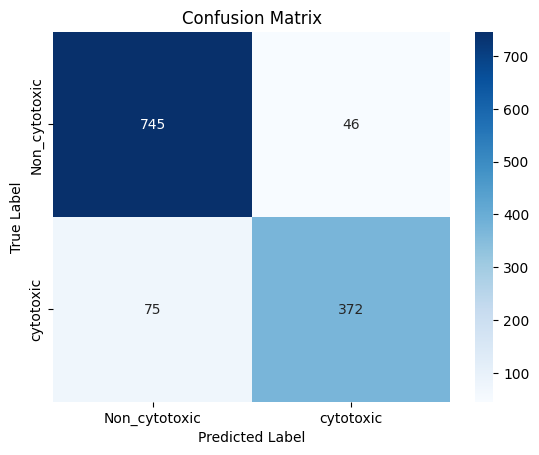

In [17]:
import seaborn as sns
# 指定标签顺序
labels = ["Non_cytotoxic", "cytotoxic"]
# 打印分类报告
print("Classification Report:\n")
print(classification_report(y_test, predictions,
                            target_names=labels,   # 指定类别名
                            digits=4))
# 打印混淆矩阵
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm,
                     index=[f"{n}" for n in labels],
                     columns=[f"{n}" for n in labels])
print(cm_df)

# (可选) 可视化热力图
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 保存每折指标
acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
for clf in [gbdt_model, rf_model,lr_model,cubist_model,svr_model,bpnn_model,PSO_ANN_model,CatBoost_model]:
        
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        # clf = gbdt_model
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
    
        # 如果是二分类，可以用 predict_proba 计算 AUC-ROC
        if hasattr(clf, "predict_proba"):
            y_proba = clf.predict_proba(X_test)[:, 1]  # 取正类概率
        else:
            # 没有 predict_proba，用 decision_function
            y_proba = clf.decision_function(X_test)
    
        # 分类报告
        report = classification_report(y_test, y_pred, target_names=labels, digits=4, output_dict=True)
    
        # 提取指标
        acc_list.append(report['accuracy'])
        precision_list.append(report['macro avg']['precision'])
        recall_list.append(report['macro avg']['recall'])
        f1_list.append(report['macro avg']['f1-score'])
        try:
            auc_score = roc_auc_score(y_test, y_proba)
        except:
            auc_score = np.nan
        auc_list.append(auc_score)
    
        # 输出每折结果
        # print(f"\n=== Fold {fold} ===")
        # print(classification_report(y_test, y_pred, target_names=labels, digits=4))
        cm = confusion_matrix(y_test, y_pred)
        cm_df = pd.DataFrame(cm,
                             index=[f"{n}" for n in labels],
                             columns=[f"{n}" for n in labels])
        # print("\nConfusion Matrix:\n", cm_df)
        # (可选) 可视化热力图
        # sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
        # plt.ylabel("True Label")
        # plt.xlabel("Predicted Label")
        # plt.title("Confusion Matrix")
        # plt.show()
    # 输出平均值 ± 标准差
    print(f"\n==={clf} Overall Metrics ===")
    metrics = {
        "Accuracy": acc_list,
        "Precision": precision_list,
        "Recall": recall_list,
        "F1-score": f1_list,
        "AUC-ROC": auc_list
    }
    
    for m, values in metrics.items():
        mean = np.nanmean(values)
        std = np.nanstd(values)
        print(f"{m}: {mean:.4f} ± {std:.4f}")



===GradientBoostingClassifier(subsample=0.8) Overall Metrics ===
Accuracy: 0.8574 ± 0.0082
Precision: 0.8545 ± 0.0109
Recall: 0.8291 ± 0.0110
F1-score: 0.8388 ± 0.0097
AUC-ROC: 0.9302 ± 0.0050

===RandomForestClassifier(max_depth=9, n_estimators=500) Overall Metrics ===
Accuracy: 0.8311 ± 0.0277
Precision: 0.8485 ± 0.0118
Recall: 0.7828 ± 0.0479
F1-score: 0.7970 ± 0.0435
AUC-ROC: 0.9235 ± 0.0096


/root/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/root/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n


===LogisticRegression(max_iter=1000) Overall Metrics ===
Accuracy: 0.7958 ± 0.0553
Precision: 0.7989 ± 0.0714
Recall: 0.7469 ± 0.0649
F1-score: 0.7587 ± 0.0657
AUC-ROC: 0.8736 ± 0.0715

===XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...) Overall Metrics ===
Accuracy: 0.8092 ± 0.0533
Precision

/root/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.10


===MLPClassifier(alpha=0.3, batch_size=200, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.05, max_iter=2000, random_state=0,
              validation_fraction=0.2) Overall Metrics ===
Accuracy: 0.7816 ± 0.0683
Precision: 0.7587 ± 0.1365
Recall: 0.7278 ± 0.0911
F1-score: 0.7302 ± 0.1142
AUC-ROC: 0.8419 ± 0.1161


/root/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/miniconda3/lib/python3.10


===MLPClassifier(alpha=0.3, batch_size=200, hidden_layer_sizes=(21, 12),
              learning_rate_init=0.05, max_iter=2000, random_state=0,
              validation_fraction=0.2) Overall Metrics ===
Accuracy: 0.7649 ± 0.0759
Precision: 0.7168 ± 0.1757
Recall: 0.7064 ± 0.1057
F1-score: 0.6984 ± 0.1418
AUC-ROC: 0.8184 ± 0.1267
0:	learn: 0.6683081	total: 3.33ms	remaining: 3.32s
1:	learn: 0.6494412	total: 9.28ms	remaining: 4.63s
2:	learn: 0.6256028	total: 12.5ms	remaining: 4.14s
3:	learn: 0.6059986	total: 15.9ms	remaining: 3.96s
4:	learn: 0.5912604	total: 19.4ms	remaining: 3.86s
5:	learn: 0.5788190	total: 22.7ms	remaining: 3.76s
6:	learn: 0.5644277	total: 25.7ms	remaining: 3.64s
7:	learn: 0.5549486	total: 28.5ms	remaining: 3.54s
8:	learn: 0.5482476	total: 31.4ms	remaining: 3.46s
9:	learn: 0.5360628	total: 34.4ms	remaining: 3.4s
10:	learn: 0.5254720	total: 37.3ms	remaining: 3.35s
11:	learn: 0.5144420	total: 40.2ms	remaining: 3.31s
12:	learn: 0.5071510	total: 43.2ms	remaining: 3.28s
13:	

In [19]:
# reports

In [20]:
X

,Concentration_µg/ml,Primary_size_nm,Exposure_time_h,Surface_area_m2/g,SiO$_{2}$NP_medium_serum_0.1%_FBS,SiO$_{2}$NP_medium_serum_0.5%_FBS,SiO$_{2}$NP_medium_serum_1%_FBS,SiO$_{2}$NP_medium_serum_10%_FBS,SiO$_{2}$NP_medium_serum_2%_FBS,SiO$_{2}$NP_medium_serum_20%_FBS,...,PDI_culture_less_0.101,PDI_culture_not_determined,Surface_charge_water_negative,Surface_charge_water_positive,SiO$_{2}$NP_label_FITC,SiO$_{2}$NP_label_Iodine-125,SiO$_{2}$NP_label_none,SiO$_{2}$NP_label_rhodamine,SiO$_{2}$NP_shape_rod,SiO$_{2}$NP_shape_sphere
3828,50.0,59.72,72.0,49.724000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
189,167.0,15.20,48.0,179.425837,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
644,90.0,19.40,24.0,145.000000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
3655,40.0,13.00,24.0,203.920000,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,True
604,10.0,13.80,24.0,275.000000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,300.0,11.70,4.0,233.100233,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,True
24,100.0,100.00,24.0,27.272727,False,False,False,True,False,False,...,False,True,True,False,False,False,True,False,False,True
2066,100.0,85.69,72.0,31.800000,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True
173,667.0,80.21,48.0,34.001655,False,False,False,False,False,False,...,False,True,True,False,False,False,True,False,False,True


In [21]:
y

array([1, 0, 1, ..., 1, 0, 0])

In [22]:
# import time
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import roc_auc_score
# from tabpfn import TabPFNClassifier
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

# # 数据 X, y 需提前准备好
# # X, y = ...

# models = [
#     ('TabPFN', TabPFNClassifier(random_state=42)),
#     ('RandomForest', RandomForestClassifier(random_state=42)),
#     ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
#     ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))
# ]

# results = []   # 存放 (model, total_time, mean_auc)

# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# multi = len(np.unique(y)) > 2
# scoring = 'roc_auc_ovr' if multi else 'roc_auc'

# for name, model in models:
#     start = time.time()
#     aucs = []
#     for train_idx, test_idx in cv.split(X, y):
#         X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
#         y_tr, y_te = y[train_idx], y[test_idx]
#         model.fit(X_tr, y_tr)
#         y_prob = model.predict_proba(X_te)
#         if multi:
#             auc = roc_auc_score(y_te, y_prob, multi_class='ovr')
#         else:
#             auc = roc_auc_score(y_te, y_prob[:, 1])
#         aucs.append(auc)
#     elapsed = time.time() - start
#     results.append((name, elapsed, np.mean(aucs)))

# df = pd.DataFrame(results, columns=["Model", "Time(s)", "ROC AUC"])
# print(df)

# # ---- 绘图 ----
# markers = ['^', '*', 's']   # 三角、五角星、方块
# plt.figure(figsize=(8,5))
# for i, row in df.iterrows():
#     plt.scatter(row["Time(s)"], row["ROC AUC"],
#                 marker=markers[i % len(markers)], s=150, label=row["Model"])

# plt.plot(df["Time(s)"], df["ROC AUC"], linestyle='--', color='gray', alpha=0.6)
# plt.xlabel("Average fit + predict time (s)")
# plt.ylabel("ROC AUC")
# plt.title("ROC AUC over Average Fit+Predict Time")
# plt.grid(True, alpha=0.3)
# plt.legend()
# plt.show()


In [23]:
shuffled_main_dataset

,Publication_id,Concentration_µg/ml,SiO$_{2}$NP_medium_serum,Cell_morphology,Cell_organ,Primary_size_nm,Cell_id,Exposure_time_h,Surface_modification,Hydrodynamic_size_water_nm,...,Zeta_potential_PBS/HBSS_mV,Surface_charge_culture,Zeta_potential_serum_mV,Zeta_potential_culture_mV,Cell_age,PDI_culture,Surface_charge_water,SiO$_{2}$NP_label,SiO$_{2}$NP_shape,Cell_viability
3828,104,50.0,serum_free,epithelial,liver,59.72,HepG2,72.0,unmodified,51-75,...,not_determined,not_determined,not_determined,not_determined,non_embryonic,not_determined,negative,none,sphere,1
189,5,167.0,serum_free,fibroblast,skin,15.20,CCD-966sk,48.0,chitosan,not_determined,...,not_determined,not_determined,not_determined,not_determined,non_embryonic,not_determined,negative,none,sphere,0
644,14,90.0,serum_free,endothelial,cell_hybrid,19.40,EAHY926,24.0,unmodified,less_26,...,not_determined,not_determined,not_determined,not_determined,non_embryonic,not_determined,negative,none,sphere,1
3655,100,40.0,10%_FBS,epithelial,lung,13.00,16HBE,24.0,unmodified,151-200,...,not_determined,not_determined,negative_11-20,not_determined,non_embryonic,not_determined,negative,none,sphere,0
604,14,10.0,serum_free,endothelial,cell_hybrid,13.80,EAHY926,24.0,unmodified,less_26,...,not_determined,negative,not_determined,negative_1-10,non_embryonic,not_determined,negative,none,sphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,78,300.0,serum_free,epithelial,lung,11.70,H441,4.0,unmodified,less_26,...,not_determined,not_determined,not_determined,not_determined,non_embryonic,0.101-0.2,negative,rhodamine,sphere,1
24,2,100.0,10%_FBS,monocyte_macrophage,blood,100.00,Mono_Mac_6,24.0,unmodified,not_determined,...,not_determined,not_determined,not_determined,not_determined,non_embryonic,not_determined,negative,none,sphere,0
2066,64,100.0,serum_free,epithelial,kidney,85.69,LLC-PK1,72.0,unmodified,not_determined,...,not_determined,not_determined,not_determined,not_determined,non_embryonic,not_determined,negative,none,sphere,1
173,5,667.0,serum_free,epithelial,lung,80.21,A549,48.0,unmodified,not_determined,...,not_determined,not_determined,not_determined,not_determined,non_embryonic,not_determined,negative,none,sphere,0


In [24]:
from sklearn.model_selection import StratifiedKFold
from tabpfn import TabPFNClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np
import pandas as pd

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 保存每折指标
acc_list = []
precision_list = []
recall_list = []
f1_list = []
auc_list = []
# for clf in [gbdt_model, rf_model,lr_model,cubist_model,svr_model,bpnn_model,PSO_ANN_model]:





X = shuffled_main_dataset.drop(columns=['Viability_indicator','Cell_viability','Positive_control', 'Positive_control_inducer','SiO$_{2}$NP_label', 'Interference_testing','Viability_mechanism','Assay_viability'], axis=1)
# X = pd.get_dummies(shuffled_main_dataset.drop('Cell_viability', axis=1))
# X = X.drop([
#     'SiO$_{2}$NP_medium_serum_15%_FBS',
#     'Cell_morphology_microglia',

#     'Cell_organ_heart',

#     'Cell_id_MPMC/3t3',

#     'Surface_modification_CHO',
#     'Hydrodynamic_size_water_nm_not_determined',
#     'Cell_source_hamster',
#     'Assay_viability_Sytox_Red',

#     'Viability_indicator_live_cell',
# ], axis=1)
X = X.drop('Publication_id',axis=1)


y = shuffled_main_dataset[['Cell_viability', 'Publication_id']]
y = y.drop('Publication_id',axis=1)
y = y.to_numpy().ravel()


for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    # clf = gbdt_model
    clf = TabPFNClassifier()
    # clf.fit(X_train_scaled.values, y_train)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # 如果是二分类，可以用 predict_proba 计算 AUC-ROC
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]  # 取正类概率
    else:
        # 没有 predict_proba，用 decision_function
        y_proba = clf.decision_function(X_test)

    # 分类报告
    report = classification_report(y_test, y_pred, target_names=labels, digits=4, output_dict=True)

    # 提取指标
    acc_list.append(report['accuracy'])
    precision_list.append(report['macro avg']['precision'])
    recall_list.append(report['macro avg']['recall'])
    f1_list.append(report['macro avg']['f1-score'])
    try:
        auc_score = roc_auc_score(y_test, y_proba)
    except:
        auc_score = np.nan
    auc_list.append(auc_score)

    # 输出每折结果
    print(f"\n=== Fold {fold} ===")
    print(classification_report(y_test, y_pred, target_names=labels, digits=4))
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm,
                         index=[f"{n}" for n in labels],
                         columns=[f"{n}" for n in labels])
    # print("\nConfusion Matrix:\n", cm_df)
    # (可选) 可视化热力图
    # sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
    # plt.ylabel("True Label")
    # plt.xlabel("Predicted Label")
    # plt.title("Confusion Matrix")
    # plt.show()
# 输出平均值 ± 标准差
print(f"\n==={clf} Overall Metrics ===")
metrics = {
    "Accuracy": acc_list,
    "Precision": precision_list,
    "Recall": recall_list,
    "F1-score": f1_list,
    "AUC-ROC": auc_list
}

for m, values in metrics.items():
    mean = np.nanmean(values)
    std = np.nanstd(values)
    print(f"{m}: {mean:.4f} ± {std:.4f}")



=== Fold 1 ===
               precision    recall  f1-score   support

Non_cytotoxic     0.9007    0.9362    0.9181       533
    cytotoxic     0.8745    0.8116    0.8419       292

     accuracy                         0.8921       825
    macro avg     0.8876    0.8739    0.8800       825
 weighted avg     0.8915    0.8921    0.8912       825


=== Fold 2 ===
               precision    recall  f1-score   support

Non_cytotoxic     0.9026    0.9212    0.9118       533
    cytotoxic     0.8505    0.8185    0.8342       292

     accuracy                         0.8848       825
    macro avg     0.8766    0.8698    0.8730       825
 weighted avg     0.8842    0.8848    0.8843       825


=== Fold 3 ===
               precision    recall  f1-score   support

Non_cytotoxic     0.8948    0.9418    0.9177       533
    cytotoxic     0.8826    0.7979    0.8381       292

     accuracy                         0.8909       825
    macro avg     0.8887    0.8699    0.8779       825
 weighted

               precision    recall  f1-score   support

Non_cytotoxic     0.8523    0.9162    0.8831       680
    cytotoxic     0.6724    0.5200    0.5865       225

     accuracy                         0.8177       905
    macro avg     0.7623    0.7181    0.7348       905
 weighted avg     0.8075    0.8177    0.8093       905


Confusion Matrix:
                Non_cytotoxic  cytotoxic
Non_cytotoxic            623         57
cytotoxic                108        117


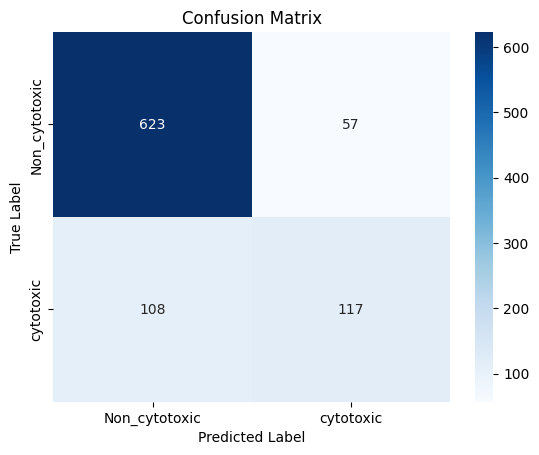


===TabPFNClassifier() AUC ROC ===


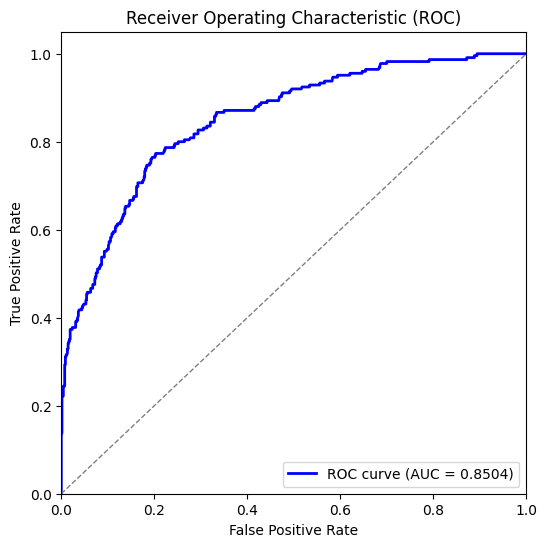

In [25]:
from sklearn.metrics import roc_curve, auc
X = independent_dataset.drop(columns=['Viability_indicator','Cell_viability','Positive_control', 'Positive_control_inducer','SiO$_{2}$NP_label', 'Interference_testing','Viability_mechanism','Assay_viability'], axis=1)
# X = pd.get_dummies(shuffled_main_dataset.drop('Cell_viability', axis=1))
# X = X.drop([
#     'SiO$_{2}$NP_medium_serum_15%_FBS',
#     'Cell_morphology_microglia',

#     'Cell_organ_heart',

#     'Cell_id_MPMC/3t3',

#     'Surface_modification_CHO',
#     'Hydrodynamic_size_water_nm_not_determined',
#     'Cell_source_hamster',
#     'Assay_viability_Sytox_Red',

#     'Viability_indicator_live_cell',
# ], axis=1)
X_test = X.drop('Publication_id',axis=1)


y = independent_dataset[['Cell_viability', 'Publication_id']]
y = y.drop('Publication_id',axis=1)
y_test = y.to_numpy().ravel()


y_pred = clf.predict(X_test)

# 如果是二分类，可以用 predict_proba 计算 AUC-ROC
if hasattr(clf, "predict_proba"):
    y_proba = clf.predict_proba(X_test)[:, 1]  # 取正类概率
else:
    # 没有 predict_proba，用 decision_function
    y_proba = clf.decision_function(X_test)

# 分类报告
# report = classification_report(y_test, y_pred, target_names=labels, digits=4, output_dict=True)

# 提取指标
# acc_list.append(report['accuracy'])
# precision_list.append(report['macro avg']['precision'])
# recall_list.append(report['macro avg']['recall'])
# f1_list.append(report['macro avg']['f1-score'])
# print(report)
try:
    auc_score = roc_auc_score(y_test, y_proba)
except:
    auc_score = np.nan
auc_list.append(auc_score)

# 输出每折结果
# print(f"\n=== Fold {fold} ===")
print(classification_report(y_test, y_pred, target_names=labels, digits=4))
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index=[f"{n}" for n in labels],
                     columns=[f"{n}" for n in labels])
print("\nConfusion Matrix:\n", cm_df)
# (可选) 可视化热力图
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix")
plt.show()
# 输出平均值 ± 标准差
print(f"\n==={clf} AUC ROC ===")




# 假设 y_test 和 y_proba 已经计算好（上一段代码里每折都可用）
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [26]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # ====== 示例假数据 ======
# time_points = np.array([5, 30, 60, 300, 900, 3600, 14400])

# # 假设有四个模型，每个点有平均AUC和标准差
# data = {
#     'TabPFN':      (np.array([0.93,0.94,0.945,0.947,0.948,0.95,0.952]),
#                     np.array([0.005,0.004,0.004,0.003,0.003,0.003,0.002])),
#     'TabPFN (PHE)':(np.array([0.95,0.96,0.962,0.965,0.966,0.968,0.969]),
#                     np.array([0.004,0.004,0.003,0.003,0.003,0.003,0.002])),
#     'AutoGluon':   (np.array([0.88,0.89,0.90,0.91,0.915,0.92,0.925]),
#                     np.array([0.01,0.009,0.008,0.008,0.007,0.007,0.006])),
#     'CatBoost':    (np.array([0.75,0.76,0.78,0.82,0.84,0.86,0.87]),
#                     np.array([0.03,0.03,0.025,0.02,0.018,0.015,0.015])),
# }

# colors = {
#     'TabPFN': 'dodgerblue',
#     'TabPFN (PHE)': 'green',
#     'AutoGluon': 'purple',
#     'CatBoost': 'red'
# }

# markers = {
#     'TabPFN': '^',
#     'TabPFN (PHE)': 'p',
#     'AutoGluon': '*',
#     'CatBoost': 's'
# }

# fig, ax = plt.subplots(figsize=(8,5))

# for name,(mean,std) in data.items():
#     ax.plot(time_points, mean, marker=markers[name],
#             color=colors[name], label=name, linewidth=2)
#     ax.fill_between(time_points, mean-std, mean+std,
#                     color=colors[name], alpha=0.2)

# # 纵轴范围
# ax.set_ylim(0.7, 1.0)
# ax.set_ylabel('Normalized ROC AUC', fontsize=12)
# ax.set_xlabel('Average fit + predict time (s)', fontsize=12)

# # 如果时间跨度差异很大，可改为对数横轴：
# # ax.set_xscale('log')

# # 垂直虚线（例如截止时间）
# ax.axvline(x=14400, color='k', linestyle='--')

# ax.legend()
# ax.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()
